In [1]:
import numpy as np

from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# from qiskit_textbook.tools import random_state, array_to_latex

# IBMQ.load_account()

## Creating Alice's bit, circuit and entangled bits to share

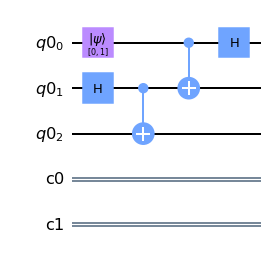

In [2]:
qr = QuantumRegister (3)
cx = ClassicalRegister (1)
cz = ClassicalRegister (1)
q = QuantumCircuit(qr, cx, cz)

# Setting up Alice's gate

psi = [0,1]
# psi = [np.sqrt(0.5),np.sqrt(0.5)]
# array_to_latex(psi, pretext="|\\psi\\rangle =")
init_gate = Initialize(psi)
q.append(init_gate, [0])

# Step 1 : Creating entangled bits

q.h(qr[1])
q.cx(qr[1],qr[2])

# Step 2 : Alice sets up

q.cx(qr[0],qr[1])
q.h(qr[0])

q.draw(output="mpl")


## Alice sends the bits after measuring

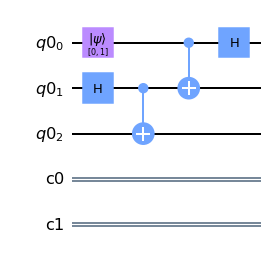

In [3]:
q.draw(output="mpl")


## Bob applies the gates based on the reading of classical bit

In [4]:
q.cx(qr[1], qr[2])
q.cz(qr[0], qr[2])

## Testing in IBMQ

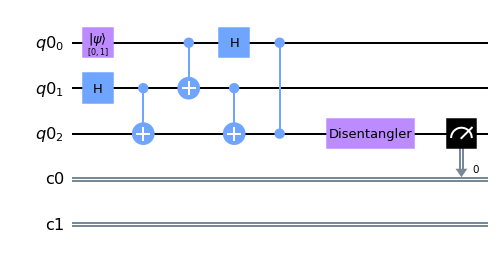

In [5]:
inverse_init_gate = init_gate.gates_to_uncompute()
q.append(inverse_init_gate, [2])

q.measure(2,0)
q.draw(output="mpl")

In [6]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
job_exp = execute(q, backend=backend, shots=1024)

/home/arijit/anaconda3/envs/quantume/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [7]:
job_monitor(job_exp)

Job Status: job has successfully run


In [ ]:
exp_result = job_exp.result()
exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)